In [746]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import category_encoders as ce

### Data Understanding and Prepration

In [747]:
# Load data from csv
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [748]:
#Check all columns 
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [749]:
#get shape of dataframe
house_data.shape

(1460, 81)

In [750]:
#get model description of dataframe
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [751]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [752]:
#cheked any null column exist or not
nuni = house_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [753]:
#Drop columns with maximum missing values
house_data = house_data.drop(columns=['PoolQC','Fence', 'MiscFeature'])

In [754]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [755]:
house_data.Alley.value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [756]:
#check unique values of FireplaceQu 
house_data.FireplaceQu.value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [757]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

In [758]:
#Drop Alley column because more than 90% values are missing or No Alley
house_data=house_data.drop(columns=['Alley'])

In [759]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [760]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [761]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


In [762]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [763]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [764]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

In [765]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [766]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [767]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [768]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [769]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [770]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [771]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])    

In [772]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [773]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [774]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [775]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [776]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [777]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [778]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [779]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [780]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [781]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [782]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [783]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [784]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [785]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [786]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [787]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [788]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [789]:
house_data.ExterQual.value_counts()

ExterQual
3    906
4    488
5     52
2     14
Name: count, dtype: int64

In [790]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [791]:
for c in house_data.columns:
    if house_data[c].dtype == object :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSSubClass
MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64
MSZoning
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
Street
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64
LotShape
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64
LandContour
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64
Utilities
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64
LotConfig
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: flo

In [792]:
#Drop columns which have moe than 80% bias data
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [793]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [794]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


### Create Dummy Varibales

In [795]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [796]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [797]:
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [798]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')

In [799]:
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [800]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [801]:
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [802]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [803]:
# data_encoded=encoder.fit_transform(house_data) 
# data_encoded

In [804]:
#create dummy variable for Condition1
# Condition1_df = pd.get_dummies(house_data['Condition1'],drop_first=True, prefix='Condition1')
# #concat Condition1_df with main house_data df
# house_data = pd.concat([house_data,Condition1_df],axis=1)
# house_data.head()

In [805]:
# #create dummy variable for Condition1
# BldgType_df = pd.get_dummies(house_data['BldgType'],drop_first=True, prefix='BldgType')
# #concat BldgType_df with main house_data df
# house_data = pd.concat([house_data,BldgType_df],axis=1)
# house_data.head()

In [806]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False

In [807]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PCon

In [808]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,

In [809]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,Fal

In [810]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False

In [811]:
# #create dummy variable for ExterQual
# ExterQual_df = pd.get_dummies(house_data['ExterQual'],drop_first=True, prefix='ExterQual')
# #concat ExterQual_df with main house_data df
# house_data = pd.concat([house_data,ExterQual_df],axis=1)
# house_data.head()

In [812]:
# #create dummy variable for ExterCond
# ExterCond_df = pd.get_dummies(house_data['ExterCond'],drop_first=True, prefix='ExterCond')
# #concat ExterCond_df with main house_data df
# house_data = pd.concat([house_data,ExterCond_df],axis=1)
# house_data.head()

In [813]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkF

In [814]:
# #create dummy variable for BsmtQual
# BsmtQual_df = pd.get_dummies(house_data['BsmtQual'],drop_first=True, prefix='BsmtQual')
# #concat BsmtQual_df with main house_data df
# house_data = pd.concat([house_data,BsmtQual_df],axis=1)
# house_data.head()

In [815]:
# #create dummy variable for BsmtExposure
# BsmtExposure_df = pd.get_dummies(house_data['BsmtExposure'],drop_first=True, prefix='BsmtExposure')
# #concat BsmtExposure_df with main house_data df
# house_data = pd.concat([house_data,BsmtExposure_df],axis=1)
# house_data.head()

In [816]:
# #create dummy variable for BsmtFinType1
# BsmtFinType1_df = pd.get_dummies(house_data['BsmtFinType1'],drop_first=True, prefix='BsmtFinType1')
# #concat BsmtFinType1_df with main house_data df
# house_data = pd.concat([house_data,BsmtFinType1_df],axis=1)
# house_data.head()

In [817]:
# #create dummy variable for BsmtFinType2
# BsmtFinType2_df = pd.get_dummies(house_data['BsmtFinType2'],drop_first=True, prefix='BsmtFinType2')
# #concat BsmtFinType2_df with main house_data df
# house_data = pd.concat([house_data,BsmtFinType2_df],axis=1)
# house_data.head()

In [818]:
# #create dummy variable for HeatingQC
# HeatingQC_df = pd.get_dummies(house_data['HeatingQC'],drop_first=True, prefix='HeatingQC')
# #concat HeatingQC_df with main house_data df
# house_data = pd.concat([house_data,HeatingQC_df],axis=1)
# house_data.head()

In [819]:
# #create dummy variable for KitchenQual
# KitchenQual_df = pd.get_dummies(house_data['KitchenQual'],drop_first=True, prefix='KitchenQual')
# #concat KitchenQual_df with main house_data df
# house_data = pd.concat([house_data,KitchenQual_df],axis=1)
# house_data.head()

In [820]:
# #create dummy variable for FireplaceQu
# FireplaceQu_df = pd.get_dummies(house_data['FireplaceQu'],drop_first=True, prefix='FireplaceQu')
# #concat FireplaceQu_df with main house_data df
# house_data = pd.concat([house_data,FireplaceQu_df],axis=1)
# house_data.head()

In [821]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Fa

In [822]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,

In [823]:
# #create dummy variable for SaleType
# SaleType_df = pd.get_dummies(house_data['SaleType'],drop_first=True, prefix='SaleType')
# #concat SaleType_df with main house_data df
# house_data = pd.concat([house_data,SaleType_df],axis=1)
# house_data.head()

In [824]:
# #create dummy variable for SaleCondition
# SaleCondition_df = pd.get_dummies(house_data['SaleCondition'],drop_first=True, prefix='SaleCondition')
# #concat SaleCondition_df with main house_data df
# house_data = pd.concat([house_data,SaleCondition_df],axis=1)
# house_data.head()

In [825]:
house_data.shape

(1460, 162)

In [826]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [827]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: bool(107), float64(3), int64(39)
memory usage: 631.8 KB


In [828]:
# #check the correaltion with new columns with heatmap
# plt.figure(figsize=(100,85))
# sns.heatmap(house_data.corr(), annot =True, cmap="YlGnBu")
# plt.show()

### Prepairing Data For Modeling

In [829]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [830]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,69.569050,10489.964740,6.093046,5.580803,1984.984329,104.489716,3.399608,3.479922,1.691479,3.593536,448.165524,50.087169,563.745348,1061.998041,4.150833,1168.611166,343.540646,5.999021,1518.150833,0.439765,0.059745,1.567091,0.377081,2.856024,1.053869,3.511263,6.504407,0.598433,1.798237,1868.316357,1.771792,471.995103,92.641528,47.035260,23.241920,3.940255,14.047013,2.149853,48.711068,6.288932,180609.596474,36.497551
std,22.090553,10308.062725,1.399636,1.092121,20.604962,187.341089,0.571342,0.900348,1.058956,2.114914,465.115135,170.847470,448.739203,459.098042,0.974565,397.896911,435.498994,48.207914,531.849898,0.525381,0.241230,0.551872,0.500807,0.819993,0.230169,0.659114,1.605514,0.645769,1.825859,455.160037,0.746119,212.213075,124.479090,66.195468,63.167621,32.333667,51.081766,34.524133,578.364428,2.748576,79099.444132,30.346064
min,21.000000,1477.000000,1.000000,1.000000,1950.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000
25%,60.000000,7449.000000,5.000000,5.000000,1967.000000,0.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,216.000000,793.000000,3.000000,876.000000,0.000000,0.000000,1135.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1958.000000,1.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,129500.000000,8.000000
50%,69.000000,9505.000000,6.000000,5.000000,1994.000000,0.000000,3.000000,4.000000,1.000000,4.000000,392.000000,0.000000,462.000000,994.000000,5.000000,1086.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,1.000000,2.000000,1978.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,161000.000000,34.000000
75%,78.000000,11512.000000,7.000000,6.000000,2004.000000,158.000000,4.000000,4.000000,3.000000,6.000000,712.000000,0.000000,806.000000,1314.000000,5.000000,1422.000000,728.000000,0.000000,1774.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,4.000000,7.000000,1.000000,4.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,215000.000000,54.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5.000000,5.000000,4.000000,6.000000,5644.000000,1474.000000,2336.000000,6110.000000,5.000000,4692.000000,2065.000000,515.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,5.000000,14.000000,3.000000,5.000000,2010.000000,4.000000,1418.000000,857.000000,523.000000,552.000000,508.000000,374.000000,648.000000,15500.000000,12.000000,755000.000000,136.000000


### Rescalling The Numeric Factors

In [831]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,Fals

In [832]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03
mean,-1.043892e-17,-7.655211e-17,-2.696722e-16,1.539741e-16,-8.420732e-16,-6.611318e-17,1.243972e-16,1.287467e-16,6.263354e-17,8.612112e-17,-6.437336e-17,-1.870307e-17,-1.304865e-17,1.879006e-16,-3.270863e-16,0.000000,-6.350345e-17,-1.130883e-17,-5.915390e-17,4.871498e-17,-5.219462e-18,6.611318e-17,4.784507e-17,-3.479641e-18,3.862402e-16,3.070783e-16,-2.392253e-16,9.395031e-17,-2.435749e-17,2.296563e-16,7.481229e-17,-9.569013e-17,-4.523534e-17,-7.133264e-17,5.306453e-17,-2.087785e-17,-3.479641e-18,0.000000,-1.391856e-17,5.567426e-17,180609.596474,-9.742995e-17
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,79099.444132,1.000490e+00
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-6.533017e-01,-1.699973e+00,-9.640305e-01,-2.933126e-01,-1.256903e+00,-2.314361e+00,-3.234651e+00,-2.003035,-7.892303e-01,-1.245016e-01,-2.031927e+00,-8.374505e-01,-2.477915e-01,-2.840982e+00,-7.533165e-01,-3.484694e+00,-2.341549e-01,-2.293993e+00,-2.183802e+00,-9.271528e-01,-9.853544e-01,-4.106758e+00,-2.375841e+00,-2.225247e+00,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-1.925187e+00,34900.000000,-1.203301e+00
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.533017e-01,-1.226909e+00,-9.640305e-01,-2.933126e-01,-7.753184e-01,-5.862144e-01,-1.181447e+00,-0.735755,-7.892303e-01,-1.245016e-01,-7.207646e-01,-8.374505e-01,-2.477915e-01,-1.028080e+00,-7.533165e-01,-1.044452e+00,-2.341549e-01,-7.760625e-01,-9.374844e-01,-9.271528e-01,-9.853544e-01,1.971342e-01,-1.034916e+00,-6.694436e-01,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-8.331783e-01,129500.000000,-9.395458e-01
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.533017e-01,1.922837e-01,-1.208154e-01,-2.933126e-01,-2.268472e-01,-1.481848e-01,8.717571e-01,-0.207721,-7.892303e-01,-1.245016e-01,-9.810360e-02,-8.374505e-01,-2.477915e-01,7.848212e-01,-7.533165e-01,1.756687e-01,-2.341549e-01,-7.760625e-01,-3.143258e-01,6.221483e-01,1.105572e-01,2.410963e-01,3.060094e-01,3.773952e-02,-7.445984e-01,-3.179307e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-1.051723e-01,161000.000000,-8.234265e-02
75%,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,9.233208e-01,2.857702e-01,1.051361e+00,5.779248e-01,1.236276e+00,1.138412e+00,5.6752

### Training The Model

In [833]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [834]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

### RFE- Recursive Feature Elimination

___Take Top 35 Features from `RFE`___

In [835]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)

In [836]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 29),
 ('LotArea', False, 20),
 ('OverallQual', False, 63),
 ('OverallCond', False, 4),
 ('YearRemodAdd', False, 55),
 ('MasVnrArea', False, 40),
 ('ExterQual', False, 71),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 21),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 74),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 75),
 ('BsmtHalfBath', False, 70),
 ('FullBath', False, 47),
 ('HalfBath', False, 48),
 ('BedroomAbvGr', False, 34),
 ('KitchenAbvGr', False, 3),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 35),
 ('Fireplaces', False, 51),
 ('FireplaceQu', False, 23),
 ('GarageYrBlt', False, 46),
 ('GarageCars', True, 1),
 ('GarageArea', False, 59),
 ('WoodDeckSF', False, 67),
 ('OpenPorchSF', False, 72),
 ('EnclosedPorch', False, 54),
 ('3SsnPorch', False, 44),
 ('Scre

In [837]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'RoofStyle_Hip', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       

In [838]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_190', 'LotShape_IR2', 'LotShape_Reg', 'LotConfig_FR2', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'HouseStyle_2.5Unf',
       'HouseStyle

### Building model using statsmodel, for the detailed statistics

In [839]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col].astype(float)

In [840]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [841]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [842]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     76.28
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:03   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     952   BIC:                         2.450e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.978e+04   2.35e+04      2.964      0.003    2.36e+04    1.16e+05
BsmtQual              1.237e+04   1914.629      6.461      0.000    8613.912    1.61e+04
BsmtExposure          1.133e+04   1272.823      8.901      0.000    8832.018    1.38e+04
BsmtFinSF1            2917.6052   1096.743      2.660      0.008     765.293    5069.917
BsmtFinSF2             263.5809   1057.482      0.249      0.803   -1811.684    2338.846
BsmtUnfSF            -2703.1751   1074.419     -2.516      0.012   -4811.678    -594.672
TotalBsmtSF            411.7504   1784.276      0.231      0.818   -3089.818    3913.319
1stFlrSF              6066.6821   2091.436      2.901      0.004    1962.325    1.02e+04
2ndFlrSF              1.997e+04   2080.164      9.602      0.000    1.59e+04    2.41e+04
LowQualFinSF           -97.9775   1191.501     -0.082      0.934   -2436.250    2240.295
GrLivArea             2.089e+04   1243.327     16.798      0.000    1.84e+04    2.33e+04
KitchenQual           1.275e+04   1449.254      8.798      0.000    9906.413    1.56e+04
GarageCars            9408.6205   1763.597      5.335      0.000    5947.634    1.29e+04
MSSubClass_45        -2.097e+04   2.51e+04     -0.835      0.404   -7.02e+04    2.83e+04
MSSubClass_120       -2.614e+04   5017.459     -5.209      0.000    -3.6e+04   -1.63e+04
MSSubClass_160       -2.381e+04   7281.946     -3.269      0.001   -3.81e+04   -9517.477
MSSubClass_180       -3.139e+04   1.51e+04     -2.079      0.038    -6.1e+04   -1764.002
MSZoning_FV           4.201e+04   1.64e+04      2.566      0.010    9882.896    7.41e+04
MSZoning_RH           4.657e+04   1.57e+04      2.957      0.003    1.57e+04    7.75e+04
MSZoning_RL           4.622e+04   1.29e+04      3.580      0.000    2.09e+04    7.16e+04
MSZoning_RM           3.977e+04    1.3e+04      3.053      0.002    1.42e+04    6.53e+04
LotShape_IR3         -2.954e+04   1.15e+04     -2.574      0.010   -5.21e+04   -7020.577
LotConfig_CulDSac     1.313e+04   4346.703      3.022      0.003    4603.927    2.17e+04
LotConfig_FR3        -6621.8157    1.9e+04     -0.349      0.728   -4.39e+04    3.07e+04
Neighborhood_BrDale   3.301e+04   1.21e+04      2.729      0.006    9269.408    5.67e+04
Neighborhood_Crawfor  3.523e+04   6297.867      5.593      0.000    2.29e+04    4.76e+04
Neighborhood_Edwards -1.634e+04   4327.689     -3.777      0.000   -2.48e+04   -7850.811
Neighborhood_Gilbert  1.006e+04   5302.644      1.897      0.058    -346.095    2.05e+04
Neighborhood_NPkVill  3.777e+04   1.55e+04      2.432      0.015    7295.349    6.82e+04
Neighborhood_NoRidge  6.344e+04   6555.529      9.678      0.000    5.06e+04    7.63e+04
Neighborhood_NridgHt  6.445e+04   5509.128     11.698      0.000    5.36e+04    7.53e+04
Neighborhood_Somerst  3.673e+04   8961.644      4.099    

In [843]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
74,GarageFinish_NA,inf
40,Exterior1st_AsphShn,inf
73,GarageType_NA,inf
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
5,BsmtUnfSF,inf
6,TotalBsmtSF,inf
7,1stFlrSF,inf
8,2ndFlrSF,inf
9,LowQualFinSF,inf


___GarageType_NA has higher p-value. Lets drop it.___

In [844]:
X_train_new = X_train_rfe.drop(['GarageType_NA'],axis=1)

In [845]:
X_train_new.columns

Index(['const', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'RoofStyle_Hip', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_V

___Rebuild the model without GarageType_NA___

In [846]:
X_train_lm = sm.add_constant(X_train_new)

In [847]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [848]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     76.28
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:04   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     952   BIC:                         2.450e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.978e+04   2.35e+04      2.964      0.003    2.36e+04    1.16e+05
BsmtQual              1.237e+04   1914.629      6.461      0.000    8613.912    1.61e+04
BsmtExposure          1.133e+04   1272.823      8.901      0.000    8832.018    1.38e+04
BsmtFinSF1            2917.6052   1096.743      2.660      0.008     765.293    5069.917
BsmtFinSF2             263.5809   1057.482      0.249      0.803   -1811.684    2338.846
BsmtUnfSF            -2703.1751   1074.419     -2.516      0.012   -4811.678    -594.672
TotalBsmtSF            411.7504   1784.276      0.231      0.818   -3089.818    3913.319
1stFlrSF              6066.6821   2091.436      2.901      0.004    1962.325    1.02e+04
2ndFlrSF              1.997e+04   2080.164      9.602      0.000    1.59e+04    2.41e+04
LowQualFinSF           -97.9775   1191.501     -0.082      0.934   -2436.250    2240.295
GrLivArea             2.089e+04   1243.327     16.798      0.000    1.84e+04    2.33e+04
KitchenQual           1.275e+04   1449.254      8.798      0.000    9906.413    1.56e+04
GarageCars            9408.6205   1763.597      5.335      0.000    5947.634    1.29e+04
MSSubClass_45        -2.097e+04   2.51e+04     -0.835      0.404   -7.02e+04    2.83e+04
MSSubClass_120       -2.614e+04   5017.459     -5.209      0.000    -3.6e+04   -1.63e+04
MSSubClass_160       -2.381e+04   7281.946     -3.269      0.001   -3.81e+04   -9517.477
MSSubClass_180       -3.139e+04   1.51e+04     -2.079      0.038    -6.1e+04   -1764.002
MSZoning_FV           4.201e+04   1.64e+04      2.566      0.010    9882.896    7.41e+04
MSZoning_RH           4.657e+04   1.57e+04      2.957      0.003    1.57e+04    7.75e+04
MSZoning_RL           4.622e+04   1.29e+04      3.580      0.000    2.09e+04    7.16e+04
MSZoning_RM           3.977e+04    1.3e+04      3.053      0.002    1.42e+04    6.53e+04
LotShape_IR3         -2.954e+04   1.15e+04     -2.574      0.010   -5.21e+04   -7020.577
LotConfig_CulDSac     1.313e+04   4346.703      3.022      0.003    4603.927    2.17e+04
LotConfig_FR3        -6621.8157    1.9e+04     -0.349      0.728   -4.39e+04    3.07e+04
Neighborhood_BrDale   3.301e+04   1.21e+04      2.729      0.006    9269.408    5.67e+04
Neighborhood_Crawfor  3.523e+04   6297.867      5.593      0.000    2.29e+04    4.76e+04
Neighborhood_Edwards -1.634e+04   4327.689     -3.777      0.000   -2.48e+04   -7850.811
Neighborhood_Gilbert  1.006e+04   5302.644      1.897      0.058    -346.095    2.05e+04
Neighborhood_NPkVill  3.777e+04   1.55e+04      2.432      0.015    7295.349    6.82e+04
Neighborhood_NoRidge  6.344e+04   6555.529      9.678      0.000    5.06e+04    7.63e+04
Neighborhood_NridgHt  6.445e+04   5509.128     11.698      0.000    5.36e+04    7.53e+04
Neighborhood_Somerst  3.673e+04   8961.644      4.099    

___Exterior1st_CBlock has higher p-value. Lets drop it.___

In [849]:
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

___Rebuild the model without Exterior1st_CBlock___

In [850]:
X_train_lm = sm.add_constant(X_train_new)

In [851]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [852]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     76.28
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:04   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     952   BIC:                         2.450e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.978e+04   2.35e+04      2.964      0.003    2.36e+04    1.16e+05
BsmtQual              1.237e+04   1914.629      6.461      0.000    8613.912    1.61e+04
BsmtExposure          1.133e+04   1272.823      8.901      0.000    8832.018    1.38e+04
BsmtFinSF1            2917.6052   1096.743      2.660      0.008     765.293    5069.917
BsmtFinSF2             263.5809   1057.482      0.249      0.803   -1811.684    2338.846
BsmtUnfSF            -2703.1751   1074.419     -2.516      0.012   -4811.678    -594.672
TotalBsmtSF            411.7504   1784.276      0.231      0.818   -3089.818    3913.319
1stFlrSF              6066.6821   2091.436      2.901      0.004    1962.325    1.02e+04
2ndFlrSF              1.997e+04   2080.164      9.602      0.000    1.59e+04    2.41e+04
LowQualFinSF           -97.9775   1191.501     -0.082      0.934   -2436.250    2240.295
GrLivArea             2.089e+04   1243.327     16.798      0.000    1.84e+04    2.33e+04
KitchenQual           1.275e+04   1449.254      8.798      0.000    9906.413    1.56e+04
GarageCars            9408.6205   1763.597      5.335      0.000    5947.634    1.29e+04
MSSubClass_45        -2.097e+04   2.51e+04     -0.835      0.404   -7.02e+04    2.83e+04
MSSubClass_120       -2.614e+04   5017.459     -5.209      0.000    -3.6e+04   -1.63e+04
MSSubClass_160       -2.381e+04   7281.946     -3.269      0.001   -3.81e+04   -9517.477
MSSubClass_180       -3.139e+04   1.51e+04     -2.079      0.038    -6.1e+04   -1764.002
MSZoning_FV           4.201e+04   1.64e+04      2.566      0.010    9882.896    7.41e+04
MSZoning_RH           4.657e+04   1.57e+04      2.957      0.003    1.57e+04    7.75e+04
MSZoning_RL           4.622e+04   1.29e+04      3.580      0.000    2.09e+04    7.16e+04
MSZoning_RM           3.977e+04    1.3e+04      3.053      0.002    1.42e+04    6.53e+04
LotShape_IR3         -2.954e+04   1.15e+04     -2.574      0.010   -5.21e+04   -7020.577
LotConfig_CulDSac     1.313e+04   4346.703      3.022      0.003    4603.927    2.17e+04
LotConfig_FR3        -6621.8157    1.9e+04     -0.349      0.728   -4.39e+04    3.07e+04
Neighborhood_BrDale   3.301e+04   1.21e+04      2.729      0.006    9269.408    5.67e+04
Neighborhood_Crawfor  3.523e+04   6297.867      5.593      0.000    2.29e+04    4.76e+04
Neighborhood_Edwards -1.634e+04   4327.689     -3.777      0.000   -2.48e+04   -7850.811
Neighborhood_Gilbert  1.006e+04   5302.644      1.897      0.058    -346.095    2.05e+04
Neighborhood_NPkVill  3.777e+04   1.55e+04      2.432      0.015    7295.349    6.82e+04
Neighborhood_NoRidge  6.344e+04   6555.529      9.678      0.000    5.06e+04    7.63e+04
Neighborhood_NridgHt  6.445e+04   5509.128     11.698      0.000    5.36e+04    7.53e+04
Neighborhood_Somerst  3.673e+04   8961.644      4.099    

___Exterior2nd_CBlock has higher p-value. Lets drop it.___

In [853]:
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

___Rebuild the model without Exterior2nd_CBlock___

In [854]:
X_train_lm = sm.add_constant(X_train_new)

In [855]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [856]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     77.48
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:04   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     953   BIC:                         2.450e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.926e+04   2.35e+04      2.949      0.003    2.32e+04    1.15e+05
BsmtQual              1.236e+04   1913.408      6.459      0.000    8602.990    1.61e+04
BsmtExposure          1.133e+04   1272.201      8.909      0.000    8836.999    1.38e+04
BsmtFinSF1            2911.7346   1096.125      2.656      0.008     760.638    5062.831
BsmtFinSF2             257.2754   1056.859      0.243      0.808   -1816.763    2331.314
BsmtUnfSF            -2702.9453   1073.929     -2.517      0.012   -4810.485    -595.406
TotalBsmtSF            403.6810   1783.326      0.226      0.821   -3096.018    3903.380
1stFlrSF              6085.7399   2089.828      2.912      0.004    1984.543    1.02e+04
2ndFlrSF              1.994e+04   2077.723      9.599      0.000    1.59e+04     2.4e+04
LowQualFinSF           -98.4447   1190.958     -0.083      0.934   -2435.648    2238.759
GrLivArea             2.088e+04   1242.500     16.801      0.000    1.84e+04    2.33e+04
KitchenQual           1.275e+04   1448.593      8.803      0.000    9908.447    1.56e+04
GarageCars            9430.1716   1761.800      5.353      0.000    5972.716    1.29e+04
MSSubClass_45        -2.105e+04   2.51e+04     -0.839      0.402   -7.03e+04    2.82e+04
MSSubClass_120       -2.616e+04   5014.659     -5.217      0.000    -3.6e+04   -1.63e+04
MSSubClass_160       -2.382e+04   7278.513     -3.273      0.001   -3.81e+04   -9539.290
MSSubClass_180       -3.144e+04   1.51e+04     -2.084      0.037   -6.11e+04   -1834.519
MSZoning_FV           4.189e+04   1.64e+04      2.560      0.011    9783.718     7.4e+04
MSZoning_RH           4.644e+04   1.57e+04      2.951      0.003    1.56e+04    7.73e+04
MSZoning_RL           4.607e+04   1.29e+04      3.571      0.000    2.08e+04    7.14e+04
MSZoning_RM           3.971e+04    1.3e+04      3.050      0.002    1.42e+04    6.53e+04
LotShape_IR3         -2.954e+04   1.15e+04     -2.576      0.010    -5.2e+04   -7033.595
LotConfig_CulDSac     1.314e+04   4344.721      3.023      0.003    4609.511    2.17e+04
LotConfig_FR3        -6666.8433    1.9e+04     -0.351      0.726   -4.39e+04    3.06e+04
Neighborhood_BrDale   3.296e+04   1.21e+04      2.726      0.007    9230.135    5.67e+04
Neighborhood_Crawfor  3.526e+04   6294.218      5.602      0.000    2.29e+04    4.76e+04
Neighborhood_Edwards  -1.63e+04   4323.861     -3.769      0.000   -2.48e+04   -7812.176
Neighborhood_Gilbert  1.005e+04   5300.206      1.897      0.058    -347.036    2.05e+04
Neighborhood_NPkVill  3.788e+04   1.55e+04      2.441      0.015    7422.009    6.83e+04
Neighborhood_NoRidge  6.345e+04   6552.531      9.683      0.000    5.06e+04    7.63e+04
Neighborhood_NridgHt  6.444e+04   5506.596     11.703      0.000    5.36e+04    7.52e+04
Neighborhood_Somerst  3.672e+04   8957.521      4.100    

___GrLivAreaFin has higher p-value. Lets drop it.___

In [857]:
X_train_new = X_train_new.drop(['GrLivArea'],axis=1)

___Rebuild the model without GrLivArea___

In [858]:
X_train_lm = sm.add_constant(X_train_new)

In [859]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [860]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     77.48
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:04   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     953   BIC:                         2.450e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.926e+04   2.35e+04      2.949      0.003    2.32e+04    1.15e+05
BsmtQual              1.236e+04   1913.408      6.459      0.000    8602.990    1.61e+04
BsmtExposure          1.133e+04   1272.201      8.909      0.000    8836.999    1.38e+04
BsmtFinSF1            2911.7346   1096.125      2.656      0.008     760.638    5062.831
BsmtFinSF2             257.2754   1056.859      0.243      0.808   -1816.763    2331.314
BsmtUnfSF            -2702.9453   1073.929     -2.517      0.012   -4810.485    -595.406
TotalBsmtSF            403.6810   1783.326      0.226      0.821   -3096.018    3903.380
1stFlrSF               2.17e+04   2508.075      8.654      0.000    1.68e+04    2.66e+04
2ndFlrSF              3.704e+04   2713.958     13.648      0.000    3.17e+04    4.24e+04
LowQualFinSF          1793.7753   1202.573      1.492      0.136    -566.221    4153.772
KitchenQual           1.275e+04   1448.593      8.803      0.000    9908.447    1.56e+04
GarageCars            9430.1716   1761.800      5.353      0.000    5972.716    1.29e+04
MSSubClass_45        -2.105e+04   2.51e+04     -0.839      0.402   -7.03e+04    2.82e+04
MSSubClass_120       -2.616e+04   5014.659     -5.217      0.000    -3.6e+04   -1.63e+04
MSSubClass_160       -2.382e+04   7278.513     -3.273      0.001   -3.81e+04   -9539.290
MSSubClass_180       -3.144e+04   1.51e+04     -2.084      0.037   -6.11e+04   -1834.519
MSZoning_FV           4.189e+04   1.64e+04      2.560      0.011    9783.718     7.4e+04
MSZoning_RH           4.644e+04   1.57e+04      2.951      0.003    1.56e+04    7.73e+04
MSZoning_RL           4.607e+04   1.29e+04      3.571      0.000    2.08e+04    7.14e+04
MSZoning_RM           3.971e+04    1.3e+04      3.050      0.002    1.42e+04    6.53e+04
LotShape_IR3         -2.954e+04   1.15e+04     -2.576      0.010    -5.2e+04   -7033.595
LotConfig_CulDSac     1.314e+04   4344.721      3.023      0.003    4609.511    2.17e+04
LotConfig_FR3        -6666.8433    1.9e+04     -0.351      0.726   -4.39e+04    3.06e+04
Neighborhood_BrDale   3.296e+04   1.21e+04      2.726      0.007    9230.135    5.67e+04
Neighborhood_Crawfor  3.526e+04   6294.218      5.602      0.000    2.29e+04    4.76e+04
Neighborhood_Edwards  -1.63e+04   4323.861     -3.769      0.000   -2.48e+04   -7812.176
Neighborhood_Gilbert  1.005e+04   5300.206      1.897      0.058    -347.036    2.05e+04
Neighborhood_NPkVill  3.788e+04   1.55e+04      2.441      0.015    7422.009    6.83e+04
Neighborhood_NoRidge  6.345e+04   6552.531      9.683      0.000    5.06e+04    7.63e+04
Neighborhood_NridgHt  6.444e+04   5506.596     11.703      0.000    5.36e+04    7.52e+04
Neighborhood_Somerst  3.672e+04   8957.521      4.100      0.000    1.91e+04    5.43e+04
Neighborhood_StoneBr  5.261e+04   9808.587      5.364    

___Exterior1st_AsphShn has higher p-value. Lets drop it.___

In [861]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

___Rebuild the model without Exterior1st_AsphShn___

In [862]:
X_train_lm = sm.add_constant(X_train_new)

In [863]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [864]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     77.48
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:04   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     953   BIC:                         2.450e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.926e+04   2.35e+04      2.949      0.003    2.32e+04    1.15e+05
BsmtQual              1.236e+04   1913.408      6.459      0.000    8602.990    1.61e+04
BsmtExposure          1.133e+04   1272.201      8.909      0.000    8836.999    1.38e+04
BsmtFinSF1            2911.7346   1096.125      2.656      0.008     760.638    5062.831
BsmtFinSF2             257.2754   1056.859      0.243      0.808   -1816.763    2331.314
BsmtUnfSF            -2702.9453   1073.929     -2.517      0.012   -4810.485    -595.406
TotalBsmtSF            403.6810   1783.326      0.226      0.821   -3096.018    3903.380
1stFlrSF               2.17e+04   2508.075      8.654      0.000    1.68e+04    2.66e+04
2ndFlrSF              3.704e+04   2713.958     13.648      0.000    3.17e+04    4.24e+04
LowQualFinSF          1793.7753   1202.573      1.492      0.136    -566.221    4153.772
KitchenQual           1.275e+04   1448.593      8.803      0.000    9908.447    1.56e+04
GarageCars            9430.1716   1761.800      5.353      0.000    5972.716    1.29e+04
MSSubClass_45        -2.105e+04   2.51e+04     -0.839      0.402   -7.03e+04    2.82e+04
MSSubClass_120       -2.616e+04   5014.659     -5.217      0.000    -3.6e+04   -1.63e+04
MSSubClass_160       -2.382e+04   7278.513     -3.273      0.001   -3.81e+04   -9539.290
MSSubClass_180       -3.144e+04   1.51e+04     -2.084      0.037   -6.11e+04   -1834.519
MSZoning_FV           4.189e+04   1.64e+04      2.560      0.011    9783.718     7.4e+04
MSZoning_RH           4.644e+04   1.57e+04      2.951      0.003    1.56e+04    7.73e+04
MSZoning_RL           4.607e+04   1.29e+04      3.571      0.000    2.08e+04    7.14e+04
MSZoning_RM           3.971e+04    1.3e+04      3.050      0.002    1.42e+04    6.53e+04
LotShape_IR3         -2.954e+04   1.15e+04     -2.576      0.010    -5.2e+04   -7033.595
LotConfig_CulDSac     1.314e+04   4344.721      3.023      0.003    4609.511    2.17e+04
LotConfig_FR3        -6666.8433    1.9e+04     -0.351      0.726   -4.39e+04    3.06e+04
Neighborhood_BrDale   3.296e+04   1.21e+04      2.726      0.007    9230.135    5.67e+04
Neighborhood_Crawfor  3.526e+04   6294.218      5.602      0.000    2.29e+04    4.76e+04
Neighborhood_Edwards  -1.63e+04   4323.861     -3.769      0.000   -2.48e+04   -7812.176
Neighborhood_Gilbert  1.005e+04   5300.206      1.897      0.058    -347.036    2.05e+04
Neighborhood_NPkVill  3.788e+04   1.55e+04      2.441      0.015    7422.009    6.83e+04
Neighborhood_NoRidge  6.345e+04   6552.531      9.683      0.000    5.06e+04    7.63e+04
Neighborhood_NridgHt  6.444e+04   5506.596     11.703      0.000    5.36e+04    7.52e+04
Neighborhood_Somerst  3.672e+04   8957.521      4.100      0.000    1.91e+04    5.43e+04
Neighborhood_StoneBr  5.261e+04   9808.587      5.364    

In [865]:
X_train_new.shape

(1021, 70)

In [866]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
5,BsmtUnfSF,inf
6,TotalBsmtSF,inf
0,const,542.23
64,GarageType_Attchd,88.35
68,GarageType_Detchd,71.87
48,Exterior1st_VinylSd,48.96
44,Exterior1st_MetalSd,41.34
60,Exterior2nd_VinylSd,37.62


___BsmtFinSF2 has higher p-value and VIF. Lets drop it.___

In [867]:
X_train_new = X_train_new.drop(['BsmtFinSF2'],axis=1)

___Rebuild the model without BsmtFinSF2___

In [868]:
X_train_lm = sm.add_constant(X_train_new)

In [869]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [870]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     77.48
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:04   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     953   BIC:                         2.450e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.926e+04   2.35e+04      2.949      0.003    2.32e+04    1.15e+05
BsmtQual              1.236e+04   1913.408      6.459      0.000    8602.990    1.61e+04
BsmtExposure          1.133e+04   1272.201      8.909      0.000    8836.999    1.38e+04
BsmtFinSF1            2211.3280   3053.086      0.724      0.469   -3780.220    8202.876
BsmtUnfSF            -3378.6918   2928.761     -1.154      0.249   -9126.258    2368.874
TotalBsmtSF           1095.0266   3730.847      0.294      0.769   -6226.597    8416.650
1stFlrSF               2.17e+04   2508.075      8.654      0.000    1.68e+04    2.66e+04
2ndFlrSF              3.704e+04   2713.958     13.648      0.000    3.17e+04    4.24e+04
LowQualFinSF          1793.7753   1202.573      1.492      0.136    -566.221    4153.772
KitchenQual           1.275e+04   1448.593      8.803      0.000    9908.447    1.56e+04
GarageCars            9430.1716   1761.800      5.353      0.000    5972.716    1.29e+04
MSSubClass_45        -2.105e+04   2.51e+04     -0.839      0.402   -7.03e+04    2.82e+04
MSSubClass_120       -2.616e+04   5014.659     -5.217      0.000    -3.6e+04   -1.63e+04
MSSubClass_160       -2.382e+04   7278.513     -3.273      0.001   -3.81e+04   -9539.290
MSSubClass_180       -3.144e+04   1.51e+04     -2.084      0.037   -6.11e+04   -1834.519
MSZoning_FV           4.189e+04   1.64e+04      2.560      0.011    9783.718     7.4e+04
MSZoning_RH           4.644e+04   1.57e+04      2.951      0.003    1.56e+04    7.73e+04
MSZoning_RL           4.607e+04   1.29e+04      3.571      0.000    2.08e+04    7.14e+04
MSZoning_RM           3.971e+04    1.3e+04      3.050      0.002    1.42e+04    6.53e+04
LotShape_IR3         -2.954e+04   1.15e+04     -2.576      0.010    -5.2e+04   -7033.595
LotConfig_CulDSac     1.314e+04   4344.721      3.023      0.003    4609.511    2.17e+04
LotConfig_FR3        -6666.8433    1.9e+04     -0.351      0.726   -4.39e+04    3.06e+04
Neighborhood_BrDale   3.296e+04   1.21e+04      2.726      0.007    9230.135    5.67e+04
Neighborhood_Crawfor  3.526e+04   6294.218      5.602      0.000    2.29e+04    4.76e+04
Neighborhood_Edwards  -1.63e+04   4323.861     -3.769      0.000   -2.48e+04   -7812.176
Neighborhood_Gilbert  1.005e+04   5300.206      1.897      0.058    -347.036    2.05e+04
Neighborhood_NPkVill  3.788e+04   1.55e+04      2.441      0.015    7422.009    6.83e+04
Neighborhood_NoRidge  6.345e+04   6552.531      9.683      0.000    5.06e+04    7.63e+04
Neighborhood_NridgHt  6.444e+04   5506.596     11.703      0.000    5.36e+04    7.52e+04
Neighborhood_Somerst  3.672e+04   8957.521      4.100      0.000    1.91e+04    5.43e+04
Neighborhood_StoneBr  5.261e+04   9808.587      5.364      0.000    3.34e+04    7.19e+04
Neighborhood_Timber   1.228e+04   7543.090      1.628    

___BsmtFinSF1 has higher p-value and VIF. Lets drop it.___

In [871]:
X_train_new = X_train_new.drop(['BsmtFinSF1'],axis=1)

___Rebuild the model without BsmtFinSF1___

In [872]:
X_train_lm = sm.add_constant(X_train_new)

In [873]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [874]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     78.69
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:04   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     954   BIC:                         2.449e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.005e+04   2.35e+04      2.986      0.003     2.4e+04    1.16e+05
BsmtQual              1.246e+04   1907.659      6.532      0.000    8717.095    1.62e+04
BsmtExposure           1.13e+04   1270.946      8.890      0.000    8804.072    1.38e+04
BsmtUnfSF            -5296.1329   1252.402     -4.229      0.000   -7753.914   -2838.352
TotalBsmtSF           2971.1727   2684.380      1.107      0.269   -2296.799    8239.144
1stFlrSF               2.18e+04   2503.696      8.708      0.000    1.69e+04    2.67e+04
2ndFlrSF              3.695e+04   2710.416     13.632      0.000    3.16e+04    4.23e+04
LowQualFinSF          1741.9945   1200.147      1.451      0.147    -613.238    4097.227
KitchenQual           1.276e+04   1448.158      8.812      0.000    9919.921    1.56e+04
GarageCars            9459.8611   1760.884      5.372      0.000    6004.207    1.29e+04
MSSubClass_45        -2.135e+04   2.51e+04     -0.851      0.395   -7.06e+04    2.79e+04
MSSubClass_120       -2.613e+04   5013.256     -5.213      0.000    -3.6e+04   -1.63e+04
MSSubClass_160       -2.411e+04   7266.162     -3.318      0.001   -3.84e+04   -9847.155
MSSubClass_180       -3.223e+04    1.5e+04     -2.143      0.032   -6.18e+04   -2711.755
MSZoning_FV           4.146e+04   1.63e+04      2.536      0.011    9381.942    7.35e+04
MSZoning_RH           4.607e+04   1.57e+04      2.929      0.003    1.52e+04    7.69e+04
MSZoning_RL           4.556e+04   1.29e+04      3.538      0.000    2.03e+04    7.08e+04
MSZoning_RM           3.927e+04    1.3e+04      3.020      0.003    1.37e+04    6.48e+04
LotShape_IR3         -2.928e+04   1.15e+04     -2.555      0.011   -5.18e+04   -6785.626
LotConfig_CulDSac     1.309e+04   4343.189      3.014      0.003    4567.271    2.16e+04
LotConfig_FR3        -6451.3779    1.9e+04     -0.340      0.734   -4.37e+04    3.08e+04
Neighborhood_BrDale   3.324e+04   1.21e+04      2.752      0.006    9536.930     5.7e+04
Neighborhood_Crawfor  3.547e+04   6285.961      5.643      0.000    2.31e+04    4.78e+04
Neighborhood_Edwards -1.611e+04   4314.868     -3.733      0.000   -2.46e+04   -7640.401
Neighborhood_Gilbert  1.005e+04   5298.874      1.896      0.058    -352.179    2.04e+04
Neighborhood_NPkVill  3.783e+04   1.55e+04      2.439      0.015    7385.708    6.83e+04
Neighborhood_NoRidge   6.38e+04   6533.268      9.765      0.000     5.1e+04    7.66e+04
Neighborhood_NridgHt  6.453e+04   5503.803     11.725      0.000    5.37e+04    7.53e+04
Neighborhood_Somerst  3.678e+04   8954.986      4.107      0.000    1.92e+04    5.44e+04
Neighborhood_StoneBr  5.238e+04   9800.884      5.344      0.000    3.31e+04    7.16e+04
Neighborhood_Timber   1.227e+04   7541.203      1.628      0.104   -2524.980    2.71e+04
Neighborhood_Veenker  2.688e+04   1.04e+04      2.581    

___Exterior1st_CemntBd has higher VIF. Lets drop it.___

In [875]:
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

___Rebuild the model without Exterior1st_CemntBd___

In [876]:
X_train_lm = sm.add_constant(X_train_new)

In [877]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [878]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     79.78
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:05   Log-Likelihood:                -12013.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     955   BIC:                         2.448e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  6.83e+04   2.34e+04      2.914      0.004    2.23e+04    1.14e+05
BsmtQual              1.244e+04   1908.642      6.519      0.000    8696.881    1.62e+04
BsmtExposure           1.14e+04   1269.680      8.977      0.000    8906.732    1.39e+04
BsmtUnfSF            -5085.9873   1244.346     -4.087      0.000   -7527.955   -2644.020
TotalBsmtSF           2877.6923   2685.021      1.072      0.284   -2391.529    8146.914
1stFlrSF              2.168e+04   2503.570      8.660      0.000    1.68e+04    2.66e+04
2ndFlrSF              3.685e+04   2710.942     13.592      0.000    3.15e+04    4.22e+04
LowQualFinSF          1712.2662   1200.610      1.426      0.154    -643.873    4068.405
KitchenQual           1.283e+04   1448.232      8.856      0.000    9984.095    1.57e+04
GarageCars            9411.2150   1761.500      5.343      0.000    5954.358    1.29e+04
MSSubClass_45        -2.143e+04   2.51e+04     -0.854      0.393   -7.07e+04    2.78e+04
MSSubClass_120       -2.615e+04   5015.936     -5.214      0.000    -3.6e+04   -1.63e+04
MSSubClass_160       -2.418e+04   7269.869     -3.327      0.001   -3.85e+04   -9916.871
MSSubClass_180       -3.354e+04    1.5e+04     -2.232      0.026    -6.3e+04   -4055.685
MSZoning_FV           4.128e+04   1.64e+04      2.524      0.012    9182.323    7.34e+04
MSZoning_RH           4.555e+04   1.57e+04      2.896      0.004    1.47e+04    7.64e+04
MSZoning_RL           4.515e+04   1.29e+04      3.505      0.000    1.99e+04    7.04e+04
MSZoning_RM           3.892e+04    1.3e+04      2.992      0.003    1.34e+04    6.44e+04
LotShape_IR3         -2.934e+04   1.15e+04     -2.559      0.011   -5.18e+04   -6838.459
LotConfig_CulDSac     1.304e+04   4345.386      3.001      0.003    4513.427    2.16e+04
LotConfig_FR3        -6369.8577    1.9e+04     -0.335      0.737   -4.36e+04    3.09e+04
Neighborhood_BrDale   3.326e+04   1.21e+04      2.752      0.006    9542.476     5.7e+04
Neighborhood_Crawfor  3.511e+04   6284.223      5.587      0.000    2.28e+04    4.74e+04
Neighborhood_Edwards -1.606e+04   4317.059     -3.720      0.000   -2.45e+04   -7588.548
Neighborhood_Gilbert  9997.1008   5301.611      1.886      0.060    -407.051    2.04e+04
Neighborhood_NPkVill  3.668e+04   1.55e+04      2.366      0.018    6258.721    6.71e+04
Neighborhood_NoRidge  6.399e+04   6535.394      9.791      0.000    5.12e+04    7.68e+04
Neighborhood_NridgHt  6.449e+04   5506.697     11.712      0.000    5.37e+04    7.53e+04
Neighborhood_Somerst  3.655e+04   8958.352      4.080      0.000     1.9e+04    5.41e+04
Neighborhood_StoneBr  5.222e+04   9805.503      5.325      0.000     3.3e+04    7.15e+04
Neighborhood_Timber    1.36e+04   7487.681      1.816      0.070   -1095.832    2.83e+04
Neighborhood_Veenker  2.696e+04   1.04e+04      2.586    

___Exterior2nd_AsphShn has higher p-value. Lets drop it.___

In [879]:
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)

___Rebuild the model without Exterior2nd_AsphShn___

In [880]:
X_train_lm = sm.add_constant(X_train_new)

In [881]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [882]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     81.09
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:05   Log-Likelihood:                -12014.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     956   BIC:                         2.448e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.868e+04   2.34e+04      2.933      0.003    2.27e+04    1.15e+05
BsmtQual              1.237e+04   1903.354      6.500      0.000    8637.363    1.61e+04
BsmtExposure          1.141e+04   1268.930      8.994      0.000    8922.120    1.39e+04
BsmtUnfSF            -5094.4989   1243.773     -4.096      0.000   -7535.340   -2653.658
TotalBsmtSF           2625.2353   2641.351      0.994      0.321   -2558.279    7808.750
1stFlrSF              2.192e+04   2460.456      8.910      0.000    1.71e+04    2.68e+04
2ndFlrSF              3.683e+04   2709.647     13.591      0.000    3.15e+04    4.21e+04
LowQualFinSF          1714.5796   1200.150      1.429      0.153    -640.654    4069.813
KitchenQual           1.284e+04   1447.345      8.873      0.000       1e+04    1.57e+04
GarageCars            9413.0939   1760.833      5.346      0.000    5957.549    1.29e+04
MSSubClass_45        -2.149e+04   2.51e+04     -0.857      0.392   -7.07e+04    2.77e+04
MSSubClass_120        -2.61e+04   5013.097     -5.206      0.000   -3.59e+04   -1.63e+04
MSSubClass_160        -2.42e+04   7267.080     -3.330      0.001   -3.85e+04   -9936.943
MSSubClass_180       -3.345e+04    1.5e+04     -2.227      0.026   -6.29e+04   -3978.136
MSZoning_FV           4.148e+04   1.63e+04      2.538      0.011    9401.298    7.36e+04
MSZoning_RH           4.556e+04   1.57e+04      2.898      0.004    1.47e+04    7.64e+04
MSZoning_RL           4.528e+04   1.29e+04      3.517      0.000       2e+04    7.05e+04
MSZoning_RM             3.9e+04    1.3e+04      2.999      0.003    1.35e+04    6.45e+04
LotShape_IR3         -2.927e+04   1.15e+04     -2.553      0.011   -5.18e+04   -6773.896
LotConfig_CulDSac     1.305e+04   4343.688      3.005      0.003    4529.066    2.16e+04
LotConfig_FR3        -6394.7650    1.9e+04     -0.337      0.736   -4.37e+04    3.09e+04
Neighborhood_BrDale   3.337e+04   1.21e+04      2.762      0.006    9659.343    5.71e+04
Neighborhood_Crawfor   3.51e+04   6281.795      5.587      0.000    2.28e+04    4.74e+04
Neighborhood_Edwards -1.587e+04   4300.794     -3.691      0.000   -2.43e+04   -7432.359
Neighborhood_Gilbert  1.006e+04   5298.181      1.899      0.058    -335.006    2.05e+04
Neighborhood_NPkVill  3.655e+04   1.55e+04      2.359      0.019    6142.925     6.7e+04
Neighborhood_NoRidge  6.403e+04   6532.372      9.803      0.000    5.12e+04    7.69e+04
Neighborhood_NridgHt  6.454e+04   5503.868     11.727      0.000    5.37e+04    7.53e+04
Neighborhood_Somerst  3.658e+04   8954.713      4.086      0.000     1.9e+04    5.42e+04
Neighborhood_StoneBr  5.223e+04   9801.796      5.328      0.000     3.3e+04    7.15e+04
Neighborhood_Timber   1.367e+04   7483.693      1.826      0.068   -1017.914    2.84e+04
Neighborhood_Veenker  2.699e+04   1.04e+04      2.591    

___LowQualFinSF has higher p-value. Lets drop it.___

In [883]:
X_train_new = X_train_new.drop(['LowQualFinSF'],axis=1)

___Rebuild the model without LowQualFinSF___

In [884]:
X_train_lm = sm.add_constant(X_train_new)

In [885]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [886]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     82.25
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:05   Log-Likelihood:                -12015.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     957   BIC:                         2.447e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.062e+04   2.34e+04      3.019      0.003    2.47e+04    1.17e+05
BsmtQual              1.232e+04   1903.992      6.469      0.000    8580.597    1.61e+04
BsmtExposure          1.126e+04   1265.293      8.901      0.000    8779.720    1.37e+04
BsmtUnfSF            -5064.5499   1244.273     -4.070      0.000   -7506.368   -2622.732
TotalBsmtSF           2839.3654   2638.528      1.076      0.282   -2338.604    8017.335
1stFlrSF              2.192e+04   2461.789      8.902      0.000    1.71e+04    2.67e+04
2ndFlrSF               3.63e+04   2686.189     13.515      0.000     3.1e+04    4.16e+04
KitchenQual            1.29e+04   1447.508      8.914      0.000    1.01e+04    1.57e+04
GarageCars            9383.1602   1761.666      5.326      0.000    5925.986    1.28e+04
MSSubClass_45         -2.19e+04   2.51e+04     -0.872      0.383   -7.12e+04    2.74e+04
MSSubClass_120       -2.589e+04   5013.696     -5.164      0.000   -3.57e+04   -1.61e+04
MSSubClass_160       -2.432e+04   7270.515     -3.345      0.001   -3.86e+04   -1.01e+04
MSSubClass_180        -3.37e+04    1.5e+04     -2.243      0.025   -6.32e+04   -4211.477
MSZoning_FV           3.929e+04   1.63e+04      2.413      0.016    7335.263    7.12e+04
MSZoning_RH           4.336e+04   1.57e+04      2.769      0.006    1.26e+04    7.41e+04
MSZoning_RL           4.314e+04   1.28e+04      3.372      0.001     1.8e+04    6.83e+04
MSZoning_RM           3.683e+04   1.29e+04      2.851      0.004    1.15e+04    6.22e+04
LotShape_IR3          -2.94e+04   1.15e+04     -2.564      0.010   -5.19e+04   -6900.963
LotConfig_CulDSac     1.296e+04   4345.539      2.982      0.003    4430.297    2.15e+04
LotConfig_FR3        -6734.2301    1.9e+04     -0.355      0.723    -4.4e+04    3.05e+04
Neighborhood_BrDale   3.295e+04   1.21e+04      2.727      0.007    9232.895    5.67e+04
Neighborhood_Crawfor    3.5e+04   6284.839      5.569      0.000    2.27e+04    4.73e+04
Neighborhood_Edwards -1.639e+04   4287.614     -3.824      0.000   -2.48e+04   -7979.594
Neighborhood_Gilbert  1.008e+04   5301.050      1.901      0.058    -324.941    2.05e+04
Neighborhood_NPkVill  3.628e+04   1.55e+04      2.341      0.019    5862.707    6.67e+04
Neighborhood_NoRidge   6.42e+04   6534.927      9.824      0.000    5.14e+04     7.7e+04
Neighborhood_NridgHt  6.447e+04   5506.638     11.708      0.000    5.37e+04    7.53e+04
Neighborhood_Somerst  3.671e+04   8959.131      4.098      0.000    1.91e+04    5.43e+04
Neighborhood_StoneBr  5.238e+04   9806.543      5.341      0.000    3.31e+04    7.16e+04
Neighborhood_Timber    1.37e+04   7487.729      1.830      0.068    -994.045    2.84e+04
Neighborhood_Veenker  2.706e+04   1.04e+04      2.596      0.010    6601.021    4.75e+04
HouseStyle_1.5Unf     3.594e+04   2.32e+04      1.548    

___GarageFinish_NA has higher p-value. Lets drop it.___

In [887]:
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)

___Rebuild the model without GarageFinish_NA___

In [888]:
X_train_lm = sm.add_constant(X_train_new)

In [889]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [890]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     83.12
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:05   Log-Likelihood:                -12018.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     958   BIC:                         2.447e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.12e+05    1.5e+04      7.478      0.000    8.26e+04    1.41e+05
BsmtQual              1.258e+04   1904.825      6.604      0.000    8841.697    1.63e+04
BsmtExposure          1.142e+04   1266.196      9.022      0.000    8938.662    1.39e+04
BsmtUnfSF            -4976.8248   1246.475     -3.993      0.000   -7422.962   -2530.688
TotalBsmtSF           2657.6164   2643.255      1.005      0.315   -2529.622    7844.855
1stFlrSF              2.221e+04   2464.044      9.012      0.000    1.74e+04     2.7e+04
2ndFlrSF              3.658e+04   2689.528     13.600      0.000    3.13e+04    4.19e+04
KitchenQual           1.277e+04   1449.647      8.811      0.000    9928.702    1.56e+04
GarageCars            8111.5942   1676.544      4.838      0.000    4821.471    1.14e+04
MSSubClass_45            -2e+04   2.51e+04     -0.795      0.427   -6.93e+04    2.93e+04
MSSubClass_120        -2.59e+04   5024.928     -5.154      0.000   -3.58e+04    -1.6e+04
MSSubClass_160       -2.411e+04   7286.234     -3.309      0.001   -3.84e+04   -9813.838
MSSubClass_180       -3.384e+04   1.51e+04     -2.247      0.025   -6.34e+04   -4287.290
MSZoning_FV           3.779e+04   1.63e+04      2.318      0.021    5792.399    6.98e+04
MSZoning_RH            4.26e+04   1.57e+04      2.715      0.007    1.18e+04    7.34e+04
MSZoning_RL           4.215e+04   1.28e+04      3.289      0.001     1.7e+04    6.73e+04
MSZoning_RM           3.563e+04   1.29e+04      2.754      0.006    1.02e+04     6.1e+04
LotShape_IR3         -2.935e+04   1.15e+04     -2.554      0.011   -5.19e+04   -6795.419
LotConfig_CulDSac       1.3e+04   4355.241      2.984      0.003    4450.863    2.15e+04
LotConfig_FR3        -6610.3614    1.9e+04     -0.347      0.728    -4.4e+04    3.07e+04
Neighborhood_BrDale   3.238e+04   1.21e+04      2.674      0.008    8617.893    5.61e+04
Neighborhood_Crawfor  3.477e+04   6298.132      5.521      0.000    2.24e+04    4.71e+04
Neighborhood_Edwards -1.616e+04   4296.064     -3.763      0.000   -2.46e+04   -7734.136
Neighborhood_Gilbert  1.014e+04   5312.860      1.908      0.057    -286.800    2.06e+04
Neighborhood_NPkVill  3.753e+04   1.55e+04      2.417      0.016    7062.290     6.8e+04
Neighborhood_NoRidge  6.478e+04   6544.617      9.899      0.000    5.19e+04    7.76e+04
Neighborhood_NridgHt  6.536e+04   5505.263     11.873      0.000    5.46e+04    7.62e+04
Neighborhood_Somerst  3.765e+04   8969.996      4.197      0.000       2e+04    5.52e+04
Neighborhood_StoneBr  5.282e+04   9826.629      5.375      0.000    3.35e+04    7.21e+04
Neighborhood_Timber   1.407e+04   7502.767      1.875      0.061    -652.601    2.88e+04
Neighborhood_Veenker  2.769e+04   1.04e+04      2.651      0.008    7192.510    4.82e+04
HouseStyle_1.5Unf     3.521e+04   2.33e+04      1.513    

___Exterior2nd_Stone has higher p-value. Lets drop it.___

In [891]:
X_train_new = X_train_new.drop(['Exterior2nd_Stone'],axis=1)

___Rebuild the model without Exterior2nd_Stone___

In [892]:
X_train_lm = sm.add_constant(X_train_new)

In [893]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [894]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     84.51
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:05   Log-Likelihood:                -12018.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     959   BIC:                         2.447e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.123e+05    1.5e+04      7.502      0.000    8.29e+04    1.42e+05
BsmtQual              1.244e+04   1895.013      6.566      0.000    8723.642    1.62e+04
BsmtExposure          1.143e+04   1265.788      9.034      0.000    8950.931    1.39e+04
BsmtUnfSF            -4973.4851   1246.162     -3.991      0.000   -7419.004   -2527.966
TotalBsmtSF           2606.4906   2641.677      0.987      0.324   -2577.644    7790.625
1stFlrSF              2.216e+04   2462.482      8.998      0.000    1.73e+04     2.7e+04
2ndFlrSF              3.652e+04   2687.551     13.588      0.000    3.12e+04    4.18e+04
KitchenQual           1.281e+04   1448.638      8.840      0.000    9962.414    1.56e+04
GarageCars            8176.0967   1673.795      4.885      0.000    4891.373    1.15e+04
MSSubClass_45        -2.001e+04   2.51e+04     -0.796      0.426   -6.93e+04    2.93e+04
MSSubClass_120        -2.58e+04   5021.795     -5.137      0.000   -3.57e+04   -1.59e+04
MSSubClass_160       -2.415e+04   7284.315     -3.315      0.001   -3.84e+04   -9850.071
MSSubClass_180       -3.373e+04   1.51e+04     -2.240      0.025   -6.33e+04   -4184.703
MSZoning_FV            3.79e+04   1.63e+04      2.325      0.020    5907.612    6.99e+04
MSZoning_RH           4.248e+04   1.57e+04      2.709      0.007    1.17e+04    7.33e+04
MSZoning_RL           4.223e+04   1.28e+04      3.296      0.001    1.71e+04    6.74e+04
MSZoning_RM           3.554e+04   1.29e+04      2.747      0.006    1.02e+04    6.09e+04
LotShape_IR3         -2.925e+04   1.15e+04     -2.546      0.011   -5.18e+04   -6701.849
LotConfig_CulDSac       1.3e+04   4354.175      2.985      0.003    4453.937    2.15e+04
LotConfig_FR3        -6634.5386    1.9e+04     -0.349      0.727    -4.4e+04    3.07e+04
Neighborhood_BrDale   3.252e+04   1.21e+04      2.687      0.007    8769.174    5.63e+04
Neighborhood_Crawfor  3.479e+04   6296.528      5.525      0.000    2.24e+04    4.71e+04
Neighborhood_Edwards -1.628e+04   4292.256     -3.792      0.000   -2.47e+04   -7853.727
Neighborhood_Gilbert  1.014e+04   5311.559      1.909      0.057    -285.364    2.06e+04
Neighborhood_NPkVill   3.64e+04   1.54e+04      2.357      0.019    6088.973    6.67e+04
Neighborhood_NoRidge    6.5e+04   6536.222      9.945      0.000    5.22e+04    7.78e+04
Neighborhood_NridgHt  6.546e+04   5502.373     11.897      0.000    5.47e+04    7.63e+04
Neighborhood_Somerst  3.765e+04   8967.799      4.199      0.000    2.01e+04    5.53e+04
Neighborhood_StoneBr  5.285e+04   9824.155      5.380      0.000    3.36e+04    7.21e+04
Neighborhood_Timber    1.38e+04   7491.720      1.842      0.066    -901.702    2.85e+04
Neighborhood_Veenker   2.77e+04   1.04e+04      2.653      0.008    7212.075    4.82e+04
HouseStyle_1.5Unf     3.519e+04   2.33e+04      1.513    

In [895]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [896]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
43,Exterior1st_VinylSd,64.33
53,Exterior2nd_VinylSd,53.04
14,MSZoning_RL,49.38
39,Exterior1st_MetalSd,44.78
50,Exterior2nd_MetalSd,40.03
37,Exterior1st_HdBoard,23.13
44,Exterior1st_Wd Sdng,18.94
57,GarageType_Attchd,17.99
48,Exterior2nd_HdBoard,17.94
54,Exterior2nd_Wd Sdng,15.30


<li> No of columns : 21 in Final model after RFE and manual Elimenation</li>
<li> All columns VIF is < 5 </li>
<li> All columns have p-value < 0.05 which is our requirment</li>

### Residual analysis of Train Data

In [897]:
y_train_cnst = lm.predict(X_train_lm)

In [898]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

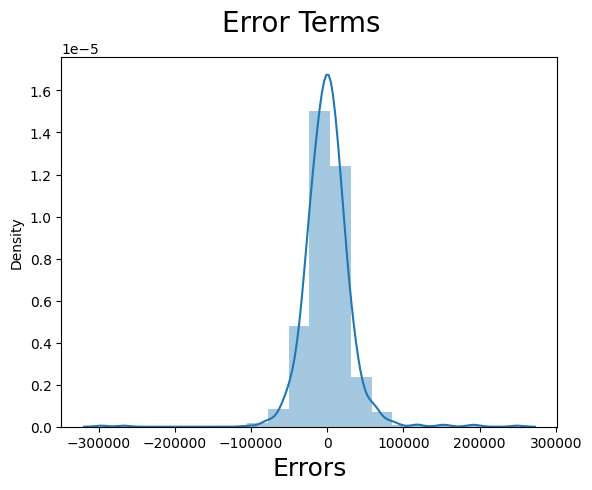

In [899]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Evaluate R2 of Train model

In [900]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.84

In [901]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1000949364898.3652
980361767.7750884
31310.729275682617


In [902]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

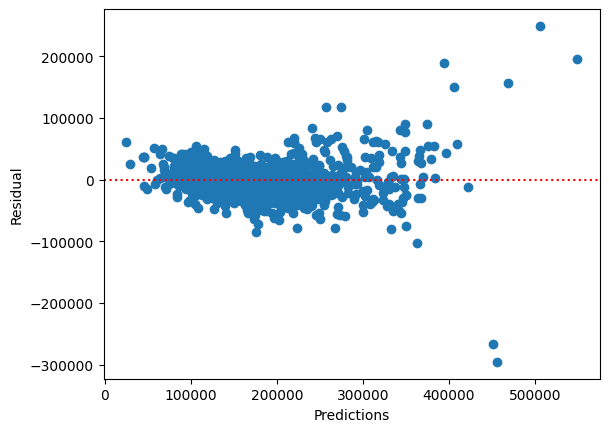

In [903]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [904]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,Fa

In [905]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.110963,-0.074960,-0.032377,-0.068902,0.025916,-0.033111,-0.019212,-0.050044,0.026373,-0.010664,-0.016811,-0.091341,-0.030499,-0.012195,0.038505,0.042261,-0.105435,0.001920,0.027773,0.075129,0.049396,0.003095,-0.020822,0.015445,0.042849,-0.018849,-0.067836,-0.054609,0.066047,0.058699,-0.030043,0.039931,181645.895216,0.005526
std,0.991429,0.891711,0.961406,1.063263,1.008023,0.878475,1.018493,0.909956,0.933225,0.988361,0.935148,0.798998,0.949447,0.844311,0.949066,0.902588,1.009237,1.029982,0.961083,0.956973,0.966692,0.995798,1.014870,0.983782,0.846603,1.024904,1.042020,0.993950,0.973170,0.990890,1.006806,1.026307,1.023814,1.004550,0.887293,0.638820,1.280055,1.477231,0.348993,0.945506,80320.777267,0.991060
min,-2.199712,-0.891969,-3.640619,-3.280366,-1.698692,-0.558025,-2.450888,-3.866981,-0.653302,-1.699973,-0.964030,-0.293313,-1.256903,-2.314361,-2.208049,-2.098584,-0.789230,-0.124502,-2.227567,-0.837450,-0.247791,-2.840982,-0.753316,-3.484694,-4.580922,-2.293993,-2.806960,-0.927153,-0.985354,-4.106758,-2.375841,-2.225247,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-1.925187,37900.000000,-1.203301
25%,-0.433386,-0.267006,-0.781333,-0.532073,-0.921799,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.688366,-0.542629,-1.181447,-0.680437,-0.789230,-0.124502,-0.747101,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.198233,-1.034916,-0.641156,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,132000.000000,-0.972515
50%,-0.025773,-0.108217,-0.066511,-0.532073,0.389207,-0.558025,-0.699764,0.577925,-0.653302,0.192284,-0.187498,-0.293313,-0.142124,-0.172157,-0.154845,-0.202692,-0.789230,-0.124502,-0.116915,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.238898,0.306009,-0.009406,-0.744598,-0.348159,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.105172,165000.000000,-0.049373
75%,0.472422,0.117445,0.648310,0.384025,0.923321,0.371218,1.051361,0.577925,0.291487,1.138412,0.555693,-0.293313,0.546809,0.405345,0.871757,0.434720,0.914249,-0.124502,0.520795,1.066863,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,0.622148,1.206469,0.291653,0.306009,0.490337,0.702136,0.279079,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,213075.000000,0.577044
max,11.025086,14.414233,2.792775,3.132319,1.214656,4.360551,2.802485,1.689151,2.181065,1.138412,3.742487,6.306447,3.057292,3.186070,0.871757,3.408051,2.861246,11.746585,3.931322,2.971177,8.047130,2.597723,3.242196,3.836032,8.459379,2.259799,3.424626,2.171449,1.754425,0.309238,1.646935,3.658517,5.106640,7.556556,4.668571,7.459033,9.126179,21.324526,4.240389,2.078846,611657.000000,3.247562


In [906]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [907]:
#trained model columns
X_train_new.columns

Index(['BsmtQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'RoofStyle_Hip', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2

In [908]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns].astype(float)

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [909]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [910]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     50.27
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          1.12e-144
Time:                        10:58:06   Log-Likelihood:                -5110.1
No. Observations:                 439   AIC:                         1.034e+04
Df Residuals:                     381   BIC:                         1.057e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.08e+05   2.35e+04      4.604      0.000    6.19e+04    1.54e+05
BsmtQual              1.287e+04   2951.609      4.360      0.000    7066.489    1.87e+04
BsmtExposure          6390.5909   1858.394      3.439      0.001    2736.598       1e+04
BsmtUnfSF            -7925.1385   1893.349     -4.186      0.000   -1.16e+04   -4202.416
TotalBsmtSF           1.584e+04   4366.608      3.627      0.000    7252.528    2.44e+04
1stFlrSF              2.094e+04   3667.549      5.710      0.000    1.37e+04    2.82e+04
2ndFlrSF              2.203e+04   3940.519      5.589      0.000    1.43e+04    2.98e+04
KitchenQual           1.205e+04   2024.340      5.950      0.000    8064.983     1.6e+04
GarageCars            1.121e+04   2377.854      4.715      0.000    6536.672    1.59e+04
MSSubClass_45         3330.5798   1.53e+04      0.218      0.828   -2.68e+04    3.34e+04
MSSubClass_120       -2.352e+04   7657.371     -3.071      0.002   -3.86e+04   -8461.430
MSSubClass_160       -4.606e+04   1.05e+04     -4.380      0.000   -6.67e+04   -2.54e+04
MSSubClass_180       -1.712e+04   1.89e+04     -0.907      0.365   -5.42e+04       2e+04
MSZoning_FV            7.96e+04   2.37e+04      3.364      0.001    3.31e+04    1.26e+05
MSZoning_RH           1.384e+04   2.68e+04      0.517      0.605   -3.88e+04    6.65e+04
MSZoning_RL           5.485e+04   1.82e+04      3.013      0.003    1.91e+04    9.06e+04
MSZoning_RM           4.829e+04   1.83e+04      2.635      0.009    1.23e+04    8.43e+04
LotShape_IR3          1.378e+04   3.05e+04      0.451      0.652   -4.63e+04    7.38e+04
LotConfig_CulDSac     1.566e+04   6106.060      2.565      0.011    3655.567    2.77e+04
LotConfig_FR3        -7.722e+04   3.07e+04     -2.519      0.012   -1.37e+05   -1.69e+04
Neighborhood_BrDale   4.882e+04   1.85e+04      2.646      0.008    1.25e+04    8.51e+04
Neighborhood_Crawfor  2.931e+04   7955.571      3.684      0.000    1.37e+04     4.5e+04
Neighborhood_Edwards  6511.7827   7328.780      0.889      0.375   -7898.138    2.09e+04
Neighborhood_Gilbert   -97.8967   6792.280     -0.014      0.989   -1.35e+04    1.33e+04
Neighborhood_NPkVill  2.999e+04   2.11e+04      1.419      0.157   -1.16e+04    7.15e+04
Neighborhood_NoRidge  3.249e+04   1.38e+04      2.351      0.019    5315.074    5.97e+04
Neighborhood_NridgHt  7.373e+04   8737.242      8.438      0.000    5.65e+04    9.09e+04
Neighborhood_Somerst  -970.3900   1.41e+04     -0.069      0.945   -2.88e+04    2.68e+04
Neighborhood_StoneBr  7.692e+04   1.05e+04      7.302      0.000    5.62e+04    9.76e+04
Neighborhood_Timber   6821.1997   8414.890      0.811      0.418   -9724.239    2.34e+04
Neighborhood_Veenker  1.552e-12   1.47e-11      0.105      0.916   -2.74e-11    3.05e-11
HouseStyle_1.5Unf     3330.5798   1.53e+04      0.218    

In [911]:
# Making predictions
y_pred = lm.predict(X_test_new)

### calculate r2 score of Test model

In [912]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.82

In [913]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

498698526412.9149
1135987531.692289
33704.41412771166


In [914]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [915]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
43,Exterior1st_VinylSd,64.33
53,Exterior2nd_VinylSd,53.04
14,MSZoning_RL,49.38
39,Exterior1st_MetalSd,44.78
50,Exterior2nd_MetalSd,40.03
37,Exterior1st_HdBoard,23.13
44,Exterior1st_Wd Sdng,18.94
57,GarageType_Attchd,17.99
48,Exterior2nd_HdBoard,17.94
54,Exterior2nd_Wd Sdng,15.30


Text(0, 0.5, 'y_pred')

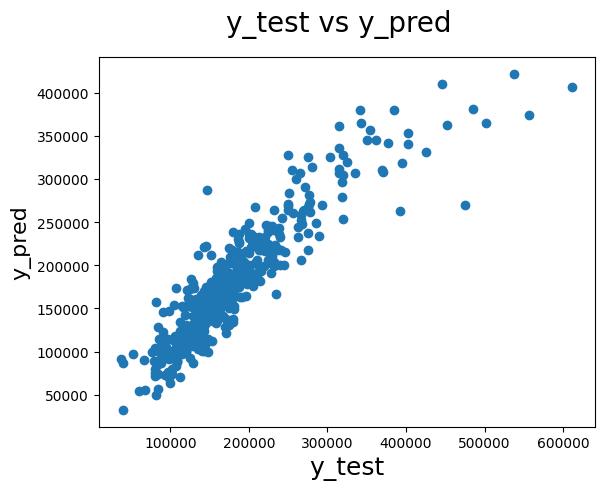

In [916]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [917]:
X_train_new.columns

Index(['BsmtQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'RoofStyle_Hip', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2

In [918]:
#final dataframe 
final_df = house_data[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,6,284,1262,1262,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
2,7,434,920,920,866,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7,540,756,961,756,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
4,8,490,1145,1145,1053,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True


### Final evalution
- No of Variables = `21` i.e. `OverallQual`,`BsmtUnfSF`, `TotalBsmtSF`,`1stFlrSF`, `2ndFlrSF`, `MSSubClass_90`, `MSSubClass_160`, `MSZoning_RL`, `LotShape_IR3`, `LotConfig_CulDSac`, `Neighborhood_Crawfor` , `Neighborhood_NoRidge`, `Neighborhood_NridgHt`, `Neighborhood_Somerst`, `Neighborhood_StoneBr`, `Neighborhood_Veenker`, `Exterior1st_ImStucc`, `Exterior1st_Stucco`, `Exterior2nd_CmentBd` , `Exterior2nd_ImStucc`, `Exterior2nd_VinylSd`
- VIF < `5`
- p-value < `0.05`
- r2 score for Train Data set model = `0.80`
- r2 score for Test Data set model = `0.82`

In [919]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8431570242306854
0.8235148495797526
1000949364898.3652
498698526412.9149
980361767.7750884
1135987531.692289


### Ridge Regression

In [920]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [921]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [922]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 12262.45760106  10902.69362005  -4256.28721132   3381.59522673
  23272.81202164  33080.04426856  14251.80517342   8991.95054356
   4332.32754433 -13920.97661986 -12109.35206895  -9710.29379091
   8574.35161077   4100.06999222  10177.81876238   -244.01996815
 -14870.88486885  11693.69868842  -1155.28282109  12138.85000389
  21422.71216882 -15093.40183225   2491.27874035   4308.95243506
  44744.74573814  43820.16126145  21899.33106562  21804.54091396
   4798.84439811  11872.52700272   9029.17599372  16333.24206716
  -6756.43528142  -8367.61986331   8327.2258689   -1337.14232473
  13393.44016     -1013.43535222   -924.16256089   -832.98796745
  -2945.86708733  -3681.00979529  -6057.88024533  -2361.55407117
    -75.50088409   8239.63912981   4464.68147898  10373.52036089
   1984.72320294   8351.24697396   3923.40675647      0.
    972.60137194  11207.88483011   2123.11502483  -5388.82089556
  11036.93048257   5010.47323747  -6229.2103951   -2581.47961138
 -13816.15039511  -3119.99978401]

In [923]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8316739217287055
0.8214055336664348
1074232877277.81
504658873417.78265
1052137979.7040255
1149564631.9311678


## Lasso

In [924]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [925]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [926]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [927]:
lasso.coef_

array([ 11971.70574136,  11218.63334537,  -4320.88697303,   2182.55946265,
        23382.50602723,  33255.92764443,  13485.56032195,   7649.30748188,
            0.        , -17395.12486658, -15407.04118652, -10109.87667064,
            0.        ,      0.        ,   8796.91730197,     -0.        ,
       -17263.53769415,  11077.41892885,     -0.        ,  15880.26085821,
        26394.75325147, -15038.08922306,   4235.52528154,      0.        ,
        61083.55619009,  56773.68790526,  34658.71107395,  38121.96450068,
         6591.20744076,  16160.10486796,  12849.91803837,  18006.3545677 ,
           -0.        ,  -8637.98863748,   7284.68617633,     -0.        ,
        17825.60081267,     -0.        ,     -0.        ,      0.        ,
           -0.        ,     -0.        ,  -3669.88669316,     -0.        ,
            0.        ,   8006.68490142,      0.        ,   8734.44297261,
            0.        ,   2745.66173993,   1757.20418455,      0.        ,
           -0.        ,  

In [928]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8353235706902544
0.8257410959994474
1050941341318.0657
492407765936.5227
1029325505.6983993
1121657781.1765893


In [929]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.431570e-01,8.316739e-01,8.353236e-01
1,R2 Score (Test),8.235148e-01,8.214055e-01,8.257411e-01
2,RSS (Train),1.000949e+12,1.074233e+12,1.050941e+12
3,RSS (Test),4.986985e+11,5.046589e+11,4.924078e+11
4,MSE (Train),3.131073e+04,3.243668e+04,3.208310e+04
5,MSE (Test),3.370441e+04,3.390523e+04,3.349116e+04


## Lets observe the changes in the coefficients after regularization

In [930]:
betas = pd.DataFrame(index=X.columns)

In [931]:
betas.rows = X.columns

In [932]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [933]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
BsmtQual,1.244249e+04,12262.457601,11971.705741
BsmtExposure,1.143497e+04,10902.693620,11218.633345
BsmtUnfSF,-4.973485e+03,-4256.287211,-4320.886973
TotalBsmtSF,2.606491e+03,3381.595227,2182.559463
1stFlrSF,2.215701e+04,23272.812022,23382.506027
2ndFlrSF,3.651750e+04,33080.044269,33255.927644
KitchenQual,1.280528e+04,14251.805173,13485.560322
GarageCars,8.176097e+03,8991.950544,7649.307482
MSSubClass_45,-2.000542e+04,4332.327544,0.000000
MSSubClass_120,-2.579667e+04,-13920.976620,-17395.124867


### Que1: Double the values of Alpha for lasso & Ridge

In [934]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 12047.90842747  10482.20811711  -3994.43079134   4155.44633619
  23358.12616732  31085.72944323  14909.77843315   9803.59353216
   3500.8553636  -10037.14557588  -8907.31343771  -5718.36483778
   6776.08431035   1801.21673447   7378.09069271  -3636.5672071
 -10142.65370385  10391.66808321   -522.84042688   6922.75995683
  16240.58568473 -13772.05341143    156.68506204   1380.6910657
  34933.97697494  34067.36258325  15794.90812372  13283.96162219
   2247.5669527    7568.8384057    5973.6972322   13458.82460283
  -3280.23252752  -5819.72972285   8445.81001378   -810.82005183
  10148.37282488   -926.49345212   -109.09815544   -661.52038697
  -3784.34406218  -1954.87902533  -5487.34709234   -495.77993892
   -506.20945909   4993.92820449   3494.52401987   7323.85919772
    634.74590301   5131.64793271   2249.80866228      0.
   -420.2364007    7648.77667527    984.59652302  -3964.75261682
   8414.29181785   5069.91123081  -4542.97240368   -760.79372237
  -8808.84704008  -3532.95811789]
0

In [935]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 11816.85705408  11031.01584574  -3687.97742059   1358.98329758
  24441.75576111  31620.89168882  14225.855822     8145.95026963
      0.         -12554.81128436  -8192.99342298     -0.
      0.              0.           8815.77717603     -0.
  -4128.04095513   9835.55627878     -0.              0.
  21198.17974885 -14323.5714157       0.              0.
  56442.77756266  50520.73808173  29023.39102722  25632.02043129
      0.           5311.84041337   3998.36336371  15760.55755963
     -0.          -6228.84360779   7204.68187845     -0.
  13874.86181625     -0.             -0.              0.
     -0.             -0.           -595.17087973     -0.
     -0.              0.              0.           4156.6509181
      0.              0.              0.              0.
     -0.           6893.0691321       0.           -610.19794646
      0.           8110.1150037      -0.             -0.
  -1250.7008949      -0.        ]
0.8270623402023181
0.8194005709372909


___As alpha value increased more feautrues removed from model. But r2score is also dropped by 1% in both test and train data___

### Que3: Drop the Top 5 features and rebuild lasso
___Top 5 features are `Neighborhood_NoRidge`, `Neighborhood_NridgHt`, `2ndFlrSF`, `Neighborhood_StoneBr`, `Neighborhood_Veenker`___

In [936]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'Neighborhood_StoneBr'
                               , 'Neighborhood_Veenker'], axis=1)

In [937]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'Neighborhood_StoneBr'
                               , 'Neighborhood_Veenker'], axis=1)

In [938]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [939]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [940]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [941]:
lasso.coef_

array([ 13812.3620229 ,   6137.69060527,  -2473.60997111,   1545.42098762,
        30095.30219511,  18502.0903391 ,  13772.47897146,     -0.        ,
        -1218.78909053,  -9109.99013413,     -0.        ,      0.        ,
            0.        ,      0.        ,  -9158.04871945,     -0.        ,
         4727.80295013,     -0.        ,      0.        ,   7988.77740145,
        -9161.87556498,     -0.        ,     -0.        ,     67.2080896 ,
           -0.        ,     -0.        , -12939.56538866,      0.        ,
        29264.88068845,   7883.0172251 ,     -0.        ,      0.        ,
           -0.        ,      0.        ,      0.        ,  -5911.47314221,
           -0.        ,     -0.        ,      0.        ,     -0.        ,
            0.        ,      0.        ,      0.        ,     -0.        ,
            0.        ,      0.        ,      0.        ,     -0.        ,
         3957.68902152,     -0.        ,     -0.        ,      0.        ,
            0.        ,  

In [942]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.74402019615357
0.7694708261225841


___After dropping the top 5 features model r2 score is very low i.e. 45% for Train and 44% for Test.___

In [943]:
X_train_new.columns

Index(['BsmtQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NPkVill', 'Neighborhood_Somerst', 'Neighborhood_Timber', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'RoofStyle_Hip', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd',
       'Exte

___Next top 5 features after drooping 5 main predictors `1stFlrSF` ,`MSSubClass_90`, `MSSubClass_120`, `TotalBsmtSF`, `HouseStyle_1Story`___ 